=== ID3 Decision Tree Results ===
Accuracy: 72.08%

Confusion Matrix:
 [[76 23]
 [20 35]]

Classification Report:
                  precision    recall  f1-score   support

tested_negative       0.79      0.77      0.78        99
tested_positive       0.60      0.64      0.62        55

       accuracy                           0.72       154
      macro avg       0.70      0.70      0.70       154
   weighted avg       0.72      0.72      0.72       154



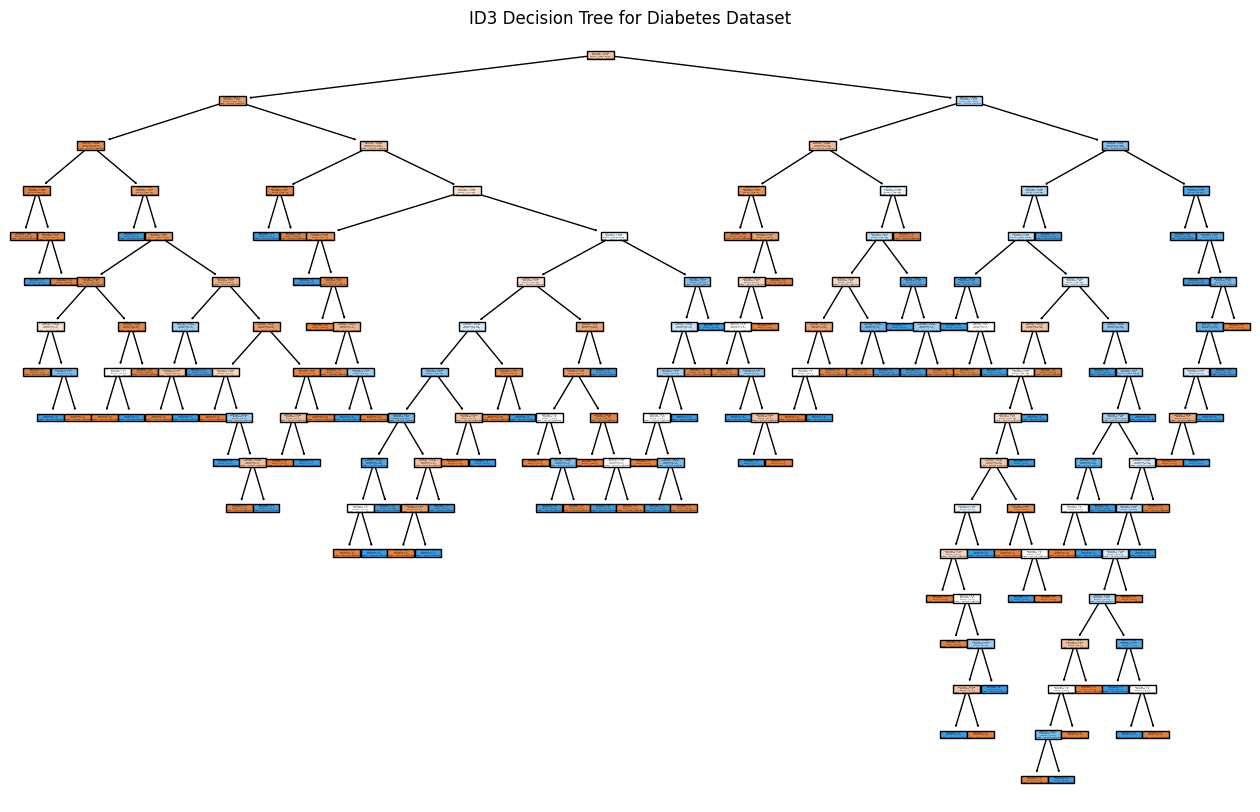

In [4]:
# Import required libraries
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the ARFF dataset
data, meta = arff.loadarff("diabetes.arff")
df = pd.DataFrame(data)

# Decode byte strings in the target column
df['class'] = df['class'].str.decode('utf-8')

# Split dataset into features and target
X = df.drop('class', axis=1)
y = df['class']

# Split into training and testing data (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model with ID3 (entropy)
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
id3.fit(X_train, y_train)

# Make predictions
y_pred = id3.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("=== ID3 Decision Tree Results ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(id3, filled=True, feature_names=X.columns, class_names=id3.classes_)
plt.title("ID3 Decision Tree for Diabetes Dataset")
plt.show()
